In [2]:
setwd(paste0(Sys.getenv('ROOT'), '/R'))
getwd()

[1] "/mnt/hdd/develop/kaggle/house-prices/R/R"

In [68]:
source('main.R')

data <- kaggle.house$loadData()

df.combined <- kaggle.house$getCombinedDataset(data$train, data$test) %>% (kaggle.house$na$fixAll)

df.training <- 
    df.combined %>% 
    filter(dataSource == "train") %>% 
    select(-dataSource)

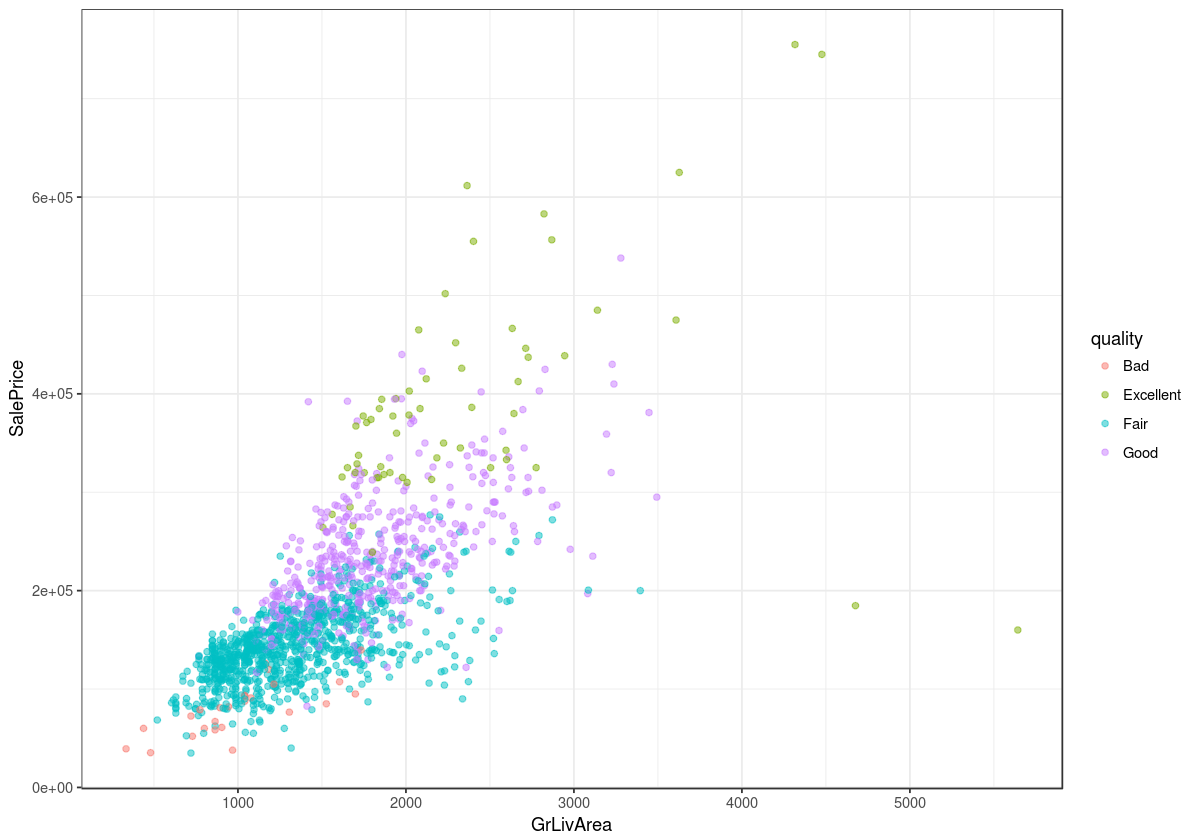

In [29]:
options(repr.plot.width = 10, repr.plot.height = 7)

df.training %>%
    mutate(
        quality = case_when(
            OverallQual %in% c(1, 2, 3) ~ 'Bad',
            OverallQual %in% c(4, 5, 6) ~ 'Fair',
            OverallQual %in% c(7, 8)    ~ 'Good',
            TRUE                       ~ 'Excellent'
        )
    ) %>%
    ggplot() +
    geom_point(aes(x=GrLivArea, y=SalePrice, colour=quality), alpha=0.5) +
    theme_bw()

In [63]:
df.training %>% 
    filter(GrLivArea > 4000) %>%
    purrr::keep(function (col) { length(unique(col)) > 1 }) %>%
    arrange(SalePrice) %>% t

LotFrontage,313,130,160,104
LotArea,63887,40094,15623,21535
LotShape,IR3,IR1,IR1,IR1
LandContour,Bnk,Bnk,Lvl,Lvl
LotConfig,Corner,Inside,Corner,Corner
Neighborhood,Edwards,Edwards,NoRidge,NoRidge
Condition1,Feedr,PosN,Norm,Norm
Condition2,Norm,PosN,Norm,Norm
OverallCond,5,5,5,6
YearBuilt,2008,2007,1996,1994
YearRemodAdd,2008,2008,1996,1995


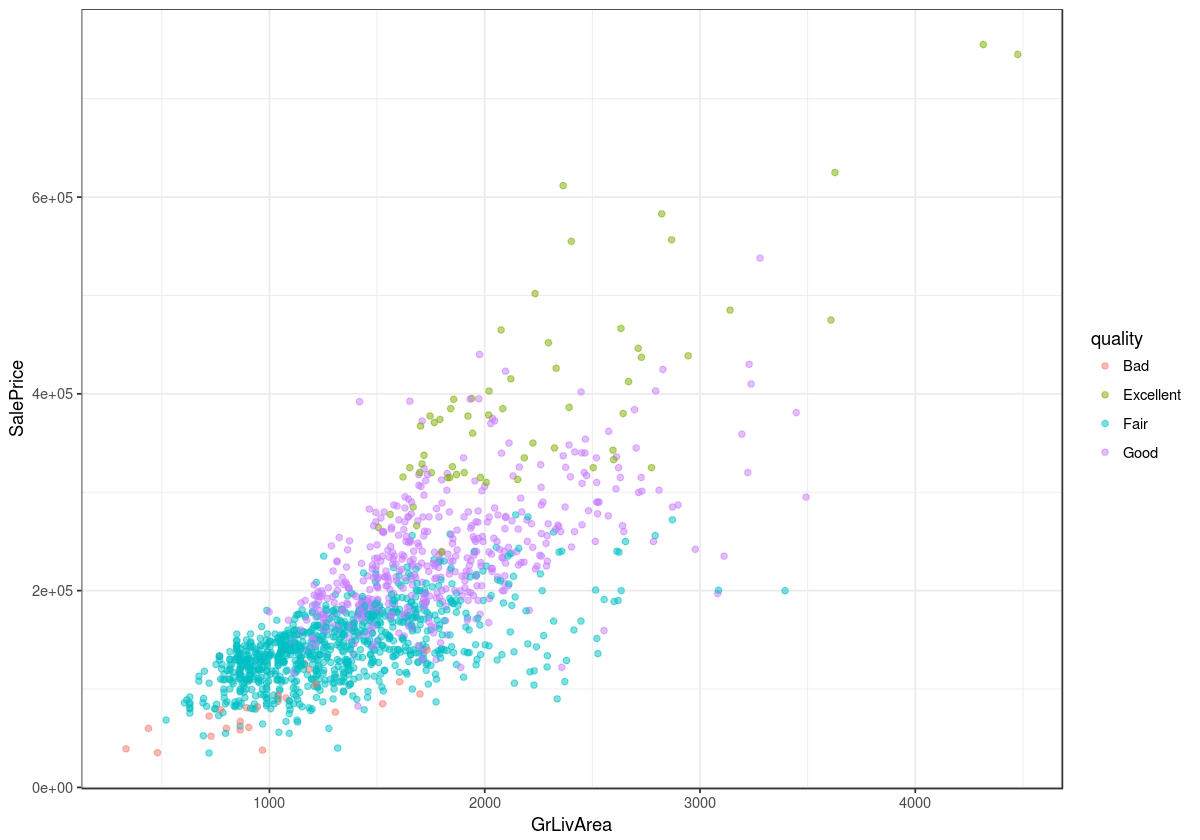

In [70]:
df.training %>% 
    (kaggle.house$outliers$removeOutliers) %>%
    mutate(
        quality = case_when(
            OverallQual %in% c(1, 2, 3) ~ 'Bad',
            OverallQual %in% c(4, 5, 6) ~ 'Fair',
            OverallQual %in% c(7, 8)    ~ 'Good',
            TRUE                       ~ 'Excellent'
        )
    ) %>%
    ggplot() +
    geom_point(aes(x=GrLivArea, y=SalePrice, colour=quality), alpha=0.5) +
    theme_bw()

In [73]:
model <- lm(SalePrice ~ GrLivArea, data=df.training)
summary(model)


Call:
lm(formula = SalePrice ~ GrLivArea, data = df.training)

Residuals:
    Min      1Q  Median      3Q     Max 
-462999  -29800   -1124   21957  339832 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18569.026   4480.755   4.144 3.61e-05 ***
GrLivArea     107.130      2.794  38.348  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56070 on 1458 degrees of freedom
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.5018 
F-statistic:  1471 on 1 and 1458 DF,  p-value: < 2.2e-16


In [74]:
model <- lm(SalePrice ~ GrLivArea, data=df.training %>% (kaggle.house$outliers$removeOutliers))
summary(model)


Call:
lm(formula = SalePrice ~ GrLivArea, data = df.training %>% (kaggle.house$outliers$removeOutliers))

Residuals:
    Min      1Q  Median      3Q     Max 
-197730  -29815    -337   23239  332534 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7168.970   4432.501   1.617    0.106    
GrLivArea    115.040      2.782  41.358   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53920 on 1456 degrees of freedom
Multiple R-squared:  0.5402,	Adjusted R-squared:  0.5399 
F-statistic:  1710 on 1 and 1456 DF,  p-value: < 2.2e-16


In [75]:
df <- 
    df.training %>%
    mutate(
        SalePrice.log = log(SalePrice),
        GrLivArea.log = log(GrLivArea)
    )

model <- lm(SalePrice.log ~ GrLivArea.log, data=df)
summary(model)


Call:
lm(formula = SalePrice.log ~ GrLivArea.log, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35338 -0.14260  0.02864  0.16585  0.86377 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.66812    0.15589   36.36   <2e-16 ***
GrLivArea.log  0.87454    0.02143   40.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.273 on 1458 degrees of freedom
Multiple R-squared:  0.5333,	Adjusted R-squared:  0.533 
F-statistic:  1666 on 1 and 1458 DF,  p-value: < 2.2e-16


In [76]:
df <- 
    df.training %>%
    (kaggle.house$outliers$removeOutliers) %>%
    mutate(
        SalePrice.log = log(SalePrice),
        GrLivArea.log = log(GrLivArea)
    )

model <- lm(SalePrice.log ~ GrLivArea.log, data=df)
summary(model)


Call:
lm(formula = SalePrice.log ~ GrLivArea.log, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35340 -0.14225  0.02929  0.16578  0.86243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.54154    0.15576   35.58   <2e-16 ***
GrLivArea.log  0.89216    0.02142   41.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2701 on 1456 degrees of freedom
Multiple R-squared:  0.5438,	Adjusted R-squared:  0.5435 
F-statistic:  1736 on 1 and 1456 DF,  p-value: < 2.2e-16
